In [1]:
import matplotlib.pyplot as plt
import numpy as np 
# from scipy import signal, stats, optimize, interpolate
# from numpy.typing import NDArray
import ipywidgets as widgets
import pandas as pd

# Clean files

In [3]:
for i in range(59,88):
    dirty_f = open(f"F00{i:02}CH2.CSV", "r")
    clean_f = open(f"F00{i:02}CH2_clean.CSV", "w")
    
    clean_f.write(',,,time(s),voltage(V),\n')
    
    dirty_lines = dirty_f.readlines()
    clean_f.writelines(dirty_lines)
    
    dirty_f.close()
    clean_f.close()

In [4]:
@widgets.interact( \
    left_cursor = widgets.FloatSlider(value = -5, min=-6, max=5, step=0.01, readout_format='.2f'), \
    right_cursor = widgets.FloatSlider(value = 5, min=-6, max=5, step=0.01, readout_format='.2f'), \
    i = (59,87), cursor_height=(0, 15))

def plot_wave(left_cursor, right_cursor, i = 59, cursor_height = 14):
    voltage = pd.read_csv(f"F00{i:02}CH2_clean.CSV")

    time = voltage['time(s)'].to_numpy()*1000
    volt = voltage['voltage(V)'].to_numpy()

    plt.figure(figsize=(12,8))
    plt.scatter(time, volt, s=1, label = 'Experimental curve')

    #cursor
    plt.plot([left_cursor, left_cursor], [0,cursor_height], color = 'green', label = 'Left cursor')
    plt.plot([right_cursor, right_cursor], [0,cursor_height], color = 'red', label = 'Right cursor')
    
    plt.legend(loc='lower left', frameon=True)
    plt.xlabel('time (ms)')
    plt.ylabel('volt (V)')
    #plt.title('Double Slit a=0.04mm d=0.25mm')

interactive(children=(FloatSlider(value=-5.0, description='left_cursor', max=5.0, min=-6.0, step=0.01), FloatS…

dirty_f = open("F0029CH2.CSV", "r")
clean_f = open("F0029CH2_clean.CSV", "w")

dirty_lines = dirty_f.readlines()

clean_line = []
clean_line.append('time(s),voltage(V)\n')

for line in dirty_lines[18:]:
    clean_line.append(line[3:-2]+'\n')

clean_f.writelines(clean_line)

dirty_f.close()
clean_f.close()

# Force vs current

In [70]:
readings = pd.read_excel("3cm.xlsx")
#小心 does not print all rows!!!
readings.head

current = readings['I(A)'].to_numpy()
mass1 = readings['mass1(g)'].to_numpy()
mass2 = readings['mass2(g)'].to_numpy()
t_left1 = readings['t_left1(ms)'].to_numpy()
t_right1 = readings['t_right1(ms)'].to_numpy()
n1 = readings['n1'].to_numpy()
t_left2 = readings['t_left2(ms)'].to_numpy()
t_right2 = readings['t_right2(ms)'].to_numpy()
n2 = readings['n2'].to_numpy()

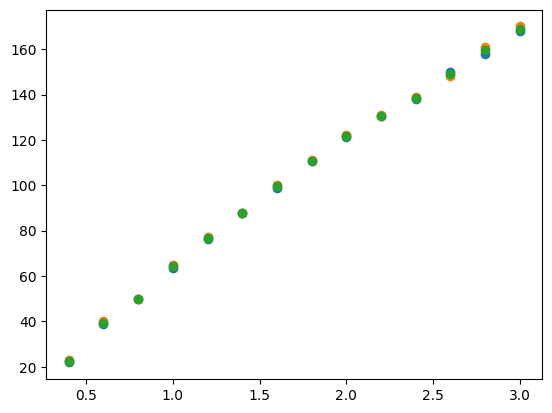

In [71]:
plt.scatter(current, mass1)
plt.scatter(current, mass2)
plt.scatter(current, 0.5*(mass1+mass2) )


In [80]:
rps1

array([ 490.19607843,  641.71122995,  722.02166065,  808.31408776,
        872.81795511,  947.36842105,  982.53275109, 1053.74077977,
       1104.97237569, 1134.02061856, 1168.96918172, 1211.45374449,
       1254.27594071, 1301.51843818])

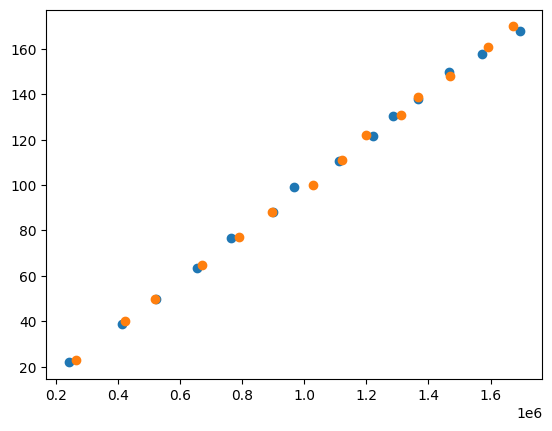

In [79]:
rps1 = 1000*n1/(t_left1 + t_right1)
rps2 = 1000*n2/(t_left2 + t_right2)

plt.scatter(rps1**2, mass1)
plt.scatter(rps2**2, mass2)


# Check Voltage vs Time

In [49]:
voltage = pd.read_csv("F0000CH2.CSV")

time = voltage['time(s)'].to_numpy()
volt = voltage['voltage(V)'].to_numpy()

voltage.head

<bound method NDFrame.head of        time(s)  voltage(V)
0    -0.005400        13.2
1    -0.005396        13.0
2    -0.005392        13.2
3    -0.005388        13.2
4    -0.005384        13.0
...        ...         ...
2495  0.004580        10.2
2496  0.004584        10.0
2497  0.004588        10.2
2498  0.004592        10.0
2499  0.004596        10.0

[2500 rows x 2 columns]>

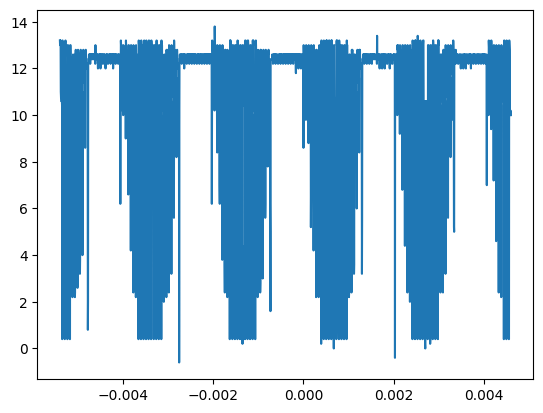

In [19]:
plt.plot(time, volt)

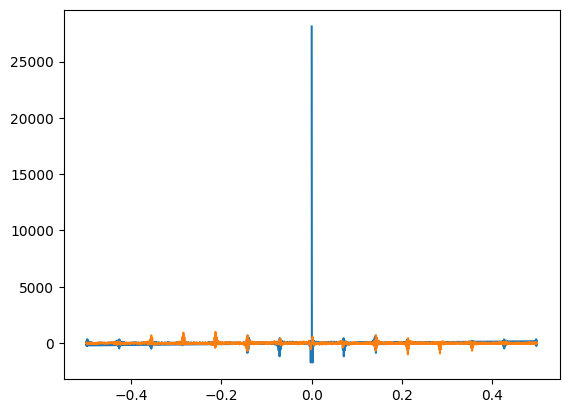

In [21]:
spectrum = np.fft.fft(volt)
frequency = np.fft.fftfreq(time.shape[-1])

plt.plot(frequency, spectrum.real, frequency, spectrum.imag)


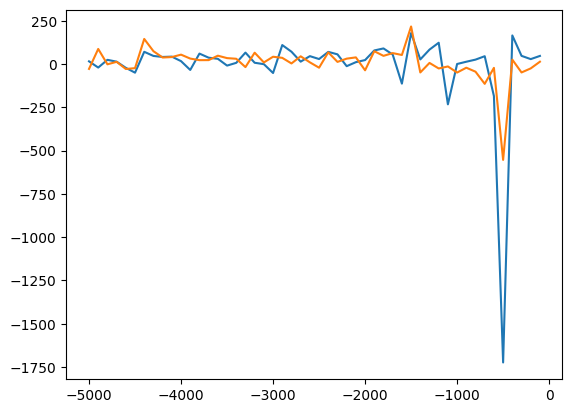

In [22]:
t_a = 2450
t_b = 2500

img_frequency = frequency[t_a:t_b]/0.000004
img_real = spectrum.real[t_a:t_b]
img_imag = spectrum.imag[t_a:t_b]

plt.plot(img_frequency, img_real, img_frequency, img_imag)

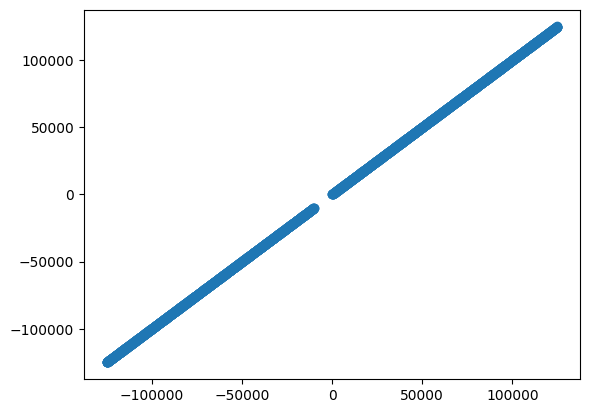

In [48]:
t_a = 0
t_b = 2400

img_frequency = frequency[t_a:t_b]/0.000004

plt.scatter(img_frequency,img_frequency)

In [41]:
frequency[2480:2500]/0.000004

array([-2000., -1900., -1800., -1700., -1600., -1500., -1400., -1300.,
       -1200., -1100., -1000.,  -900.,  -800.,  -700.,  -600.,  -500.,
        -400.,  -300.,  -200.,  -100.])

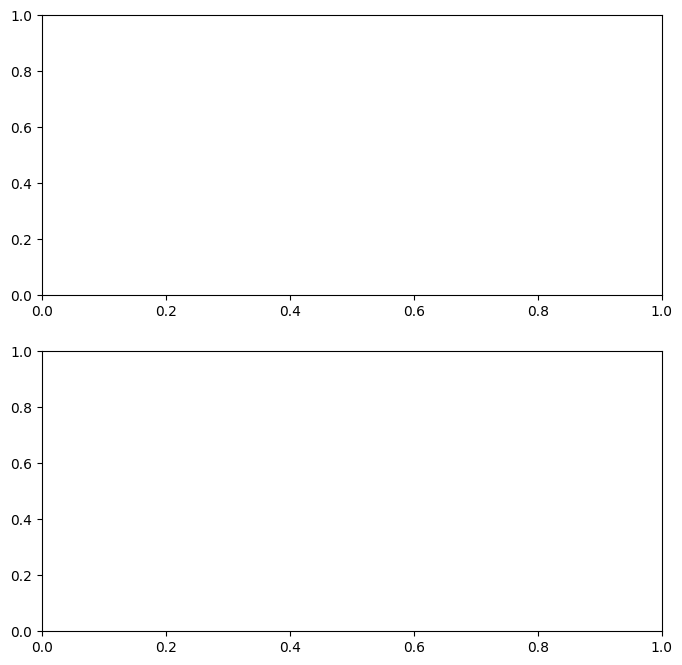

interactive(children=(IntSlider(value=1, description='i', max=28), Output()), _dom_classes=('widget-interact',…

In [33]:



@widgets.interact(i=widgets.IntSlider(min=0, max=28, step=1, value=1))
def f(i):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.figure.set_size_inches(8, 8)
    ax1.figure.set_size_inches(8, 8)

    voltage = pd.read_csv(f"F00{i:02}CH2.CSV")
    time = voltage['time(s)'].to_numpy()
    volt = voltage['voltage(V)'].to_numpy()
    
    spectrum = np.fft.fft(volt)
    frequency = np.fft.fftfreq(time.shape[-1])
    
    # plt.plot(frequency, spectrum.real, frequency, spectrum.imag)
    
    t_a = 2470
    t_b = 2500
    
    img_frequency = frequency[t_a:t_b]/0.000004
    img_real = spectrum.real[t_a:t_b]
    img_imag = spectrum.imag[t_a:t_b]

    print(img_frequency[np.argmax(np.absolute(img_real))])
    
    ax1.scatter(img_frequency, img_real, label=f'real #{i}')
    ax2.scatter(img_frequency, img_imag, label=f'imag #{i}')
    ax1.legend(loc='upper left', frameon=False)
    ax2.legend(loc='upper left', frameon=False)
    

